# Introducción a la Regresión Lineal
Se trata de un algoritmo que pertenece a los sistemas de aprendizaje supervisado. Este algoritmo es capaz de entrenarse si le pasamos valores y las respuestas esperadas para cada caso. Con un poco de esfuerzo el algoritmo será capaz de predecir las siguientes respuestas para los siguientes valores.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np

## Regresión Lineal (simple)
<center>
    $\hat{y} = f(\vec{x})$
    <br>
    $\hat{y} = \vec{\omega} \cdot \vec{x} + b$
</center>

In [32]:
# Supondremos que x es el dinero invertido e y es el dinero ganado.

x = np.array([0, 6.5, 13.2, 18.1, 24.9, 28.2, 36.1])
y = np.array([5, 10, 17, 20, 25, 30, 35])

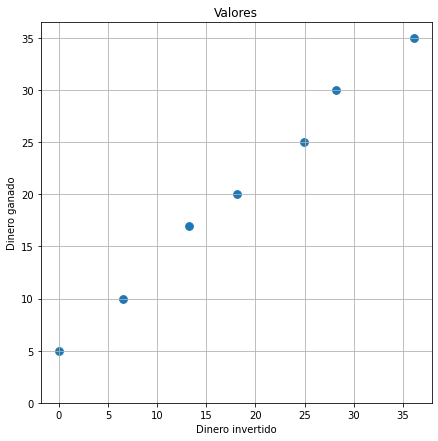

In [11]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y, s=60)
plt.ylim(bottom=0)
plt.title('Valores')
plt.xlabel('Dinero invertido')
plt.ylabel('Dinero ganado')
plt.grid()
plt.show()

In [31]:
# Prueba y error: Primero hagamos un intento de averiguar por qué número hay que
# multiplicar a los valores de x para obtener el resultado de y.

x2 = np.arange(0, 40)
y2 = 0.8 * x2  # Hemos probado con 0.2, 0.6 y finalmente con 0.8 se aproxima.

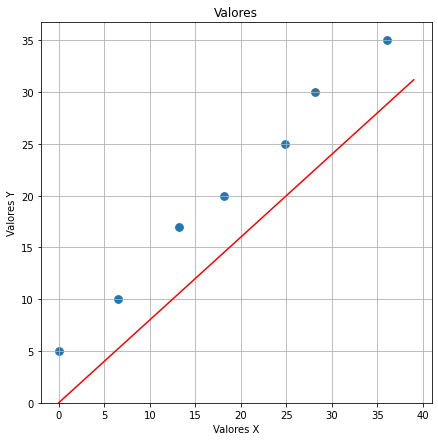

In [27]:
plt.figure(figsize=(7, 7))
plt.plot(x2, y2, color='red', label='Nuestra solución')
plt.scatter(x, y, s=60)
plt.ylim(bottom=0)
plt.title('Valores')
plt.xlabel('Valores X')
plt.ylabel('Valores Y')
plt.grid()
plt.show()

In [28]:
# Sumemos 5 a y para elevar la línea roja.
x3 = np.arange(0, 40)
y3 = 0.8 * x2 + 5

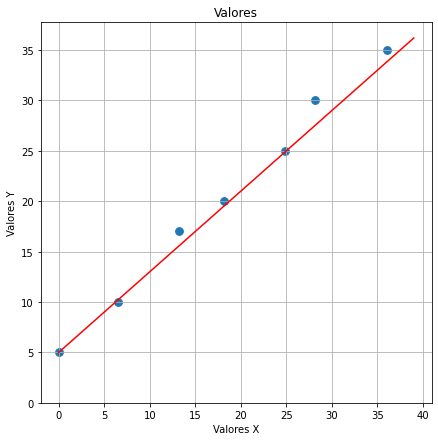

In [29]:
plt.figure(figsize=(7, 7))
plt.plot(x3, y3, color='red', label='Nuestra solución')
plt.scatter(x, y, s=60)
plt.ylim(bottom=0)
plt.title('Valores')
plt.xlabel('Valores X')
plt.ylabel('Valores Y')
plt.grid()
plt.show()

## Regresión Lineal (polinómica)

<center>
    $\hat{y} = \omega_{1}x_{1}+\omega_{2}x_{2} \cdots \omega_{n}x_{n} + b$
</center>

In [33]:
# Supondremos que x1 es el dinero invertido, x2 es la temperatura del año anterior e y
# es el dinero ganado.

# Variables independientes (x1 y x2)
x1 = np.array([0, 6.5, 13.2, 18.1, 24.9, 28.2, 36.1])
x2 = np.array([22, 23, 24, 21, 10, 17, 8])

y = np.array([5, 10, 17, 20, 25, 30, 35])

## Error Cuadrático Medio (Mean Squared Error o MSE)
El error Cuadrático Medio es el criterio de evaluación más usado para problemas de regresión.

**N**: Número total de puntos o predicciones.

<center>
    $MSE = \frac{1}{N}\displaystyle\sum^{N}_{i=1}(real_{i}-estimado_{i})^{2}$
</center>

## Raíz cuadrada del Error Cuadrático Medio (RMSE)

**N**: Número total de puntos o predicciones.

<center>
    $RMSE = \sqrt{\frac{1}{N}\displaystyle\sum^{N}_{i=1}(real_{i}-estimado_{i})^{2}}$
</center>

El error cuadrático es preciso, pero algo engañoso, ya que si vemos en una estimación de precios que nuestro sistema tiene un error cuadrático medio de 1 millón de dólares, tenemos que tener presente que estamos sumanod potencias de 2, es decir, estamos sumando números que previamente hemos elevado al cuadrado. Así pues el error real será la raíz cuadrada de ese valor, al cual por sus siglas denominaremos **RMSE**.

A la hora de visualizar puede ser que el RMSE nos dé una sensación más realista, pero a la hora de computar, el MSE tiene una carga computacional mucho menos, por eso se usa más.

In [35]:
import math

MSE = 1000000
RMSE = math.sqrt(MSE)

print(f'La raíz cuadrada de {MSE} es: {RMSE}')

La raíz cuadrada de 1000000 es: 1000.0


## Regresión usando scikit-learn
Usaremos una base de datos de fútbol europeo, la cual tiene más de 25000 partidos y más de 10000 jugadores para las temporadas de fútbol profesional europeo de 2008 a 2016.

In [4]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

### Creamos una conexión a la base de datos y leemos la tabla "Player_Attributes"

In [5]:
cnx = sqlite3.connect('../../local/6 regresión lineal/european_soccer/database.sqlite')
df = pd.read_sql_query('SELECT * FROM Player_Attributes', cnx)

In [6]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
df.shape

(183978, 42)

In [10]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

### De todas las columnas determinaremos cuáles usaremos como "features" para alimentar nuestro modelo

In [11]:
features = [
    'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
    'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
    'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes'
]

### Seleccionamos el target

In [12]:
target = ['overall_rating']

### Limpiamos los datos eliminando filas con valores nan

In [13]:
df = df.dropna()

### Separamos las features en X y el target en Y

In [14]:
X = df[features]
Y = df[target]

### Miramos cómo se ve una fila típica

In [15]:
X.iloc[3]

potential             65.0
crossing              48.0
finishing             43.0
heading_accuracy      70.0
short_passing         60.0
volleys               43.0
dribbling             50.0
curve                 44.0
free_kick_accuracy    38.0
long_passing          63.0
ball_control          48.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             46.0
balance               65.0
shot_power            54.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            34.0
aggression            62.0
interceptions         40.0
positioning           44.0
vision                53.0
penalties             47.0
marking               62.0
standing_tackle       63.0
sliding_tackle        66.0
gk_diving              5.0
gk_handling           10.0
gk_kicking             9.0
gk_positioning         7.0
gk_reflexes            7.0
Name: 3, dtype: float64

In [16]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
Y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


### Obtenemos un gráfico de dispersión

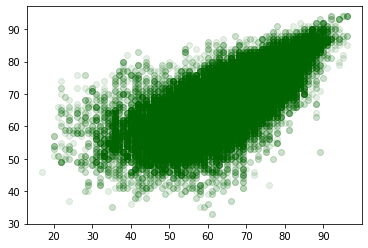

In [21]:
plt.scatter(X['reactions'], Y, color='darkgreen', label='Data', alpha=.1)

## Separamos los datos en Training y Test Datasets

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [27]:
# Escalamos los datos

scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [28]:
print(f'Min: {X_train.min()}, Max: {X_train.max()}')

Min: -5.377337896778158, Max: 4.9683467491419835


### Creamos una instancia del modelo "LinearRegression" de Scikit Learn

In [46]:
regressor = LinearRegression()

### Ajustamos el modelo a los datos de entrenamiento

In [47]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Llevamos a cabo una predicción utilizando el set de testeo que reservamos para tal fin

In [53]:
scale.fit(X_test)

X_test = scale.transform(X_test)
Y_prediction = regressor.predict(X_test)
Y_result = Y_prediction - Y_test
Y_prediction.shape

(59517, 1)

In [55]:
# Calculamos la raíz cuadrada del error cuadrático medio (RMSE)

RMSE = sqrt(mean_squared_error(y_true=Y_test, y_pred=Y_prediction))
regressor.score(X_test, Y_test)

0.8412909951610006

In [56]:
print(RMSE)

2.8051094695321193


In [57]:
regressor.coef_

array([[ 2.48175418,  0.37435166,  0.2155902 ,  1.14537904,  0.72579619,
         0.08835762, -0.2396529 ,  0.20341906,  0.23070925,  0.08573083,
         2.03147644,  0.08063536,  0.11593773, -0.09744622,  1.92780373,
         0.10753058,  0.27833167,  0.16277628, -0.08089224,  0.73874625,
        -0.25048481,  0.33897633,  0.22293067, -0.18511046, -0.01892236,
         0.21517621,  0.70526674,  0.07880386, -0.61339243,  2.72376613,
         0.51832172, -0.70907673,  0.91420565,  0.43578429]])